In [3]:
# # install dependencies
# pip install -r https://raw.githubusercontent.com/deeptendies/deeptendies/master/requirements.txt
# # install deeptendies
# pip install git+https://github.com/deeptendies/deeptendies

In [3]:
from deeptendies.stock_data import StockData

In [10]:
from deeptendies.trainer import Trainer

In [6]:
test_data = StockData('AAPL', days=365, api_key='c1h8m1n48v6t9ghtpkh0')

In [7]:
test_data.df

,c,h,l,o,s,t,v,wma
0,66.5175,66.8425,65.3075,65.6850,ok,2020-04-08 00:00:00,42223821,0.000000
1,66.9975,67.5175,66.1750,67.1750,ok,2020-04-09 00:00:00,40529123,0.000000
2,68.3125,68.4250,66.4575,67.0775,ok,2020-04-13 00:00:00,32755731,67.575000
3,71.7625,72.0625,69.5125,70.0000,ok,2020-04-14 00:00:00,48748672,69.818333
4,71.1075,71.5825,70.1575,70.6000,ok,2020-04-15 00:00:00,32788641,70.860000
...,...,...,...,...,...,...,...,...
246,122.1500,123.5200,121.1500,121.6500,ok,2021-03-31 00:00:00,118323826,121.273333
247,123.0000,124.1800,122.4900,123.6600,ok,2021-04-01 00:00:00,75089134,122.200000
248,125.9000,126.1601,123.0700,123.8700,ok,2021-04-05 00:00:00,88651175,124.308333
249,126.2100,127.1300,125.6500,126.5000,ok,2021-04-06 00:00:00,80171300,125.571667


In [10]:
test_data.engineer_features() #engineer all features
test_data.df

,c,h,l,o,s,t,v,wma,day_of_week,day_of_year,is_quarter_end,100wma,100mvwap,50wma,50mvwap,20wma,20mvwap,next_1_high,next_1_low,next_3_high,next_3_low,next_5_high,next_5_low,next_7_high,next_7_low,last_1_high,last_1_low,last_3_high,last_3_low,last_5_high,last_5_low,last_7_high,last_7_low
0,65.6175,65.7775,62.3450,62.7250,ok,2020-04-06 00:00:00,50455071,0.000000,0,97,False,NaN,64.580000,NaN,64.580000,NaN,64.580000,67.9250,64.7500,67.9250,64.7500,72.0625,64.7500,72.0625,64.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64.8575,67.9250,64.7500,67.7000,ok,2020-04-07 00:00:00,50721831,0.000000,1,98,False,NaN,65.213750,NaN,65.213750,NaN,65.213750,66.8425,65.3075,68.4250,65.3075,72.0625,65.3075,72.0625,65.3075,65.7775,62.3450,NaN,NaN,NaN,NaN,NaN,NaN
2,66.5175,66.8425,65.3075,65.6850,ok,2020-04-08 00:00:00,42223821,65.814167,2,99,False,NaN,65.510773,NaN,65.510773,NaN,65.510773,67.5175,66.1750,72.0625,66.1750,72.0625,66.1750,72.0625,66.1750,67.9250,64.7500,NaN,NaN,NaN,NaN,NaN,NaN
3,66.9975,67.5175,66.1750,67.1750,ok,2020-04-09 00:00:00,40529123,66.480833,3,100,False,NaN,65.816156,NaN,65.816156,NaN,65.816156,68.4250,66.4575,72.0625,66.4575,72.0625,66.4575,72.0625,66.3575,66.8425,65.3075,NaN,NaN,NaN,NaN,NaN,NaN
4,68.3125,68.4250,66.4575,67.0775,ok,2020-04-13 00:00:00,32755731,67.575000,0,104,False,NaN,66.105718,NaN,66.105718,NaN,66.105718,72.0625,69.5125,72.0625,69.5125,72.0625,69.2125,72.0625,66.3575,67.5175,66.1750,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,121.3900,122.5800,120.7299,121.6500,ok,2021-03-29 00:00:00,80819203,121.196667,0,88,False,127.226868,125.989007,125.067898,127.887084,121.656667,121.623458,120.4031,118.8600,124.1800,118.8600,NaN,NaN,NaN,NaN,121.4800,118.9200,124.24,120.065,127.2200,119.675,127.22,119.160
247,119.9000,120.4031,118.8600,120.1100,ok,2021-03-30 00:00:00,85671919,120.615000,1,89,False,127.102924,126.096193,124.734396,127.755455,121.489071,121.347087,123.5200,121.1500,126.1600,121.1500,NaN,NaN,NaN,NaN,122.5800,120.7299,124.24,119.000,125.8599,119.675,127.22,119.160
248,122.1500,123.5200,121.1500,121.6500,ok,2021-03-31 00:00:00,118323800,121.273333,2,90,True,127.021660,126.205302,124.494808,127.637237,121.560619,121.303930,124.1800,122.4900,NaN,NaN,NaN,NaN,NaN,NaN,120.4031,118.8600,122.90,118.920,124.2400,119.675,127.22,119.160
249,123.0000,124.1800,122.4900,123.6600,ok,2021-04-01 13:30:00,75089100,122.200000,3,91,False,126.955803,126.274975,124.293008,127.513021,121.712690,121.410810,126.1600,123.0700,NaN,NaN,NaN,NaN,NaN,NaN,123.5200,121.1500,122.58,118.920,124.2400,119.000,127.22,119.675


In [11]:
# reorder columns! NOTE: REQUIRED ORDERING! columns in index [0:x] are not to be normalized. Column at index x is the target vector. Column idx > x will be normalized. 
test_data.reorder_cols(['day_of_week', 'day_of_year','is_quarter_end', 'c', 'h', 'l', 'o', 's', 't', 'v', 'wma', '100wma', '100mvwap', '50wma', '50mvwap', '20wma','20mvwap', 'next_1_high', 'next_1_low', 'next_3_high', 'next_3_low','next_5_high', 'next_5_low', 'next_7_high', 'next_7_low', 'last_1_high','last_1_low', 'last_3_high', 'last_3_low', 'last_5_high', 'last_5_low','last_7_high', 'last_7_low'])

test_data.df

,day_of_week,day_of_year,is_quarter_end,c,h,l,o,s,t,v,wma,100wma,100mvwap,50wma,50mvwap,20wma,20mvwap,next_1_high,next_1_low,next_3_high,next_3_low,next_5_high,next_5_low,next_7_high,next_7_low,last_1_high,last_1_low,last_3_high,last_3_low,last_5_high,last_5_low,last_7_high,last_7_low
0,0,97,False,65.6175,65.7775,62.3450,62.7250,ok,2020-04-06 00:00:00,50455071,0.000000,NaN,64.580000,NaN,64.580000,NaN,64.580000,67.9250,64.7500,67.9250,64.7500,72.0625,64.7500,72.0625,64.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,98,False,64.8575,67.9250,64.7500,67.7000,ok,2020-04-07 00:00:00,50721831,0.000000,NaN,65.213750,NaN,65.213750,NaN,65.213750,66.8425,65.3075,68.4250,65.3075,72.0625,65.3075,72.0625,65.3075,65.7775,62.3450,NaN,NaN,NaN,NaN,NaN,NaN
2,2,99,False,66.5175,66.8425,65.3075,65.6850,ok,2020-04-08 00:00:00,42223821,65.814167,NaN,65.510773,NaN,65.510773,NaN,65.510773,67.5175,66.1750,72.0625,66.1750,72.0625,66.1750,72.0625,66.1750,67.9250,64.7500,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100,False,66.9975,67.5175,66.1750,67.1750,ok,2020-04-09 00:00:00,40529123,66.480833,NaN,65.816156,NaN,65.816156,NaN,65.816156,68.4250,66.4575,72.0625,66.4575,72.0625,66.4575,72.0625,66.3575,66.8425,65.3075,NaN,NaN,NaN,NaN,NaN,NaN
4,0,104,False,68.3125,68.4250,66.4575,67.0775,ok,2020-04-13 00:00:00,32755731,67.575000,NaN,66.105718,NaN,66.105718,NaN,66.105718,72.0625,69.5125,72.0625,69.5125,72.0625,69.2125,72.0625,66.3575,67.5175,66.1750,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0,88,False,121.3900,122.5800,120.7299,121.6500,ok,2021-03-29 00:00:00,80819203,121.196667,127.226868,125.989007,125.067898,127.887084,121.656667,121.623458,120.4031,118.8600,124.1800,118.8600,NaN,NaN,NaN,NaN,121.4800,118.9200,124.24,120.065,127.2200,119.675,127.22,119.160
247,1,89,False,119.9000,120.4031,118.8600,120.1100,ok,2021-03-30 00:00:00,85671919,120.615000,127.102924,126.096193,124.734396,127.755455,121.489071,121.347087,123.5200,121.1500,126.1600,121.1500,NaN,NaN,NaN,NaN,122.5800,120.7299,124.24,119.000,125.8599,119.675,127.22,119.160
248,2,90,True,122.1500,123.5200,121.1500,121.6500,ok,2021-03-31 00:00:00,118323800,121.273333,127.021660,126.205302,124.494808,127.637237,121.560619,121.303930,124.1800,122.4900,NaN,NaN,NaN,NaN,NaN,NaN,120.4031,118.8600,122.90,118.920,124.2400,119.675,127.22,119.160
249,3,91,False,123.0000,124.1800,122.4900,123.6600,ok,2021-04-01 13:30:00,75089100,122.200000,126.955803,126.274975,124.293008,127.513021,121.712690,121.410810,126.1600,123.0700,NaN,NaN,NaN,NaN,NaN,NaN,123.5200,121.1500,122.58,118.920,124.2400,119.000,127.22,119.675


In [12]:
# get cleaned df
# NOTE: See doc strings! Default behavior will drop NaNs
clean_df = test_data.get_cleaned_data(drop_cols=['next_1_high', 'next_1_low', 'next_3_high', 'next_3_low', 'next_5_high',
       'next_5_low', 'next_7_high', 'next_7_low', 'last_1_high', 'last_1_low',
       'last_3_high', 'last_3_low', 'last_5_high', 'last_5_low', 'last_7_high',
       'last_7_low', "s", "wma"])
clean_df

,day_of_week,day_of_year,is_quarter_end,c,h,l,o,v,100wma,100mvwap,50wma,50mvwap,20wma,20mvwap
t,,,,,,,,,,,,,,
2020-08-26 00:00:00,2,239,0,126.5225,126.9925,125.0825,126.179125,40755567,97.572270,90.406747,107.717724,103.476203,117.922036,114.340248
2020-08-27 00:00:00,3,240,0,125.0100,127.4850,123.8325,127.142500,38888096,98.287933,91.102718,108.633635,104.106972,118.937810,115.510863
2020-08-28 00:00:00,4,241,0,124.8075,126.4425,124.5775,126.012500,46907479,98.987825,91.856507,109.512498,104.776295,119.797060,117.059386
2020-08-31 00:00:00,0,244,0,129.0400,131.0000,126.0000,127.580000,225702688,99.759657,94.199232,110.528420,107.703757,120.971083,119.948152
2020-09-01 00:00:00,1,245,0,134.1800,134.8000,130.5300,132.760000,152470142,100.620892,95.909351,111.713275,109.624530,122.538905,121.967963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-29 00:00:00,0,88,0,121.3900,122.5800,120.7299,121.650000,80819203,127.226868,125.989007,125.067898,127.887084,121.656667,121.623458
2021-03-30 00:00:00,1,89,0,119.9000,120.4031,118.8600,120.110000,85671919,127.102924,126.096193,124.734396,127.755455,121.489071,121.347087
2021-03-31 00:00:00,2,90,1,122.1500,123.5200,121.1500,121.650000,118323800,127.021660,126.205302,124.494808,127.637237,121.560619,121.303930


In [13]:
# We can get a fully scaled data set (test scaled by train scaler) 
fully_scaled_df =  test_data.get_scaled_df(clean_df, test_percentage=0.3, ignore_cols=['day_of_week', 'day_of_year', 'is_quarter_end'], target_col = 'c')
fully_scaled_df

,day_of_week,day_of_year,is_quarter_end,c,h,l,o,v,100wma,100mvwap,50wma,50mvwap,20wma,20mvwap
t,,,,,,,,,,,,,,
2020-08-26 00:00:00,2,239,0,0.541919,0.481447,0.574406,0.553997,0.006358,0.000000,0.000000,0.000000,0.000000,0.249991,0.100338
2020-08-27 00:00:00,3,240,0,0.500275,0.495559,0.541743,0.578661,0.000000,0.026041,0.023259,0.040001,0.026080,0.295856,0.155920
2020-08-28 00:00:00,4,241,0,0.494700,0.465688,0.561210,0.549731,0.027303,0.051509,0.048450,0.078384,0.053754,0.334653,0.229445
2020-08-31 00:00:00,0,244,0,0.611233,0.596275,0.598380,0.589862,0.636032,0.079594,0.126742,0.122753,0.174792,0.387664,0.366606
2020-09-01 00:00:00,1,245,0,0.752753,0.705158,0.716749,0.722478,0.386703,0.110932,0.183892,0.174500,0.254209,0.458455,0.462509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-29 00:00:00,0,88,0,0.400606,0.355014,0.460672,0.438044,0.142759,1.079058,1.189128,0.757743,1.009293,0.418619,0.446151
2021-03-30 00:00:00,1,89,0,0.359581,0.292639,0.411811,0.398618,0.159281,1.074548,1.192710,0.743178,1.003850,0.411052,0.433029
2021-03-31 00:00:00,2,90,1,0.421531,0.381948,0.471649,0.438044,0.270448,1.071591,1.196357,0.732714,0.998962,0.414283,0.430980


In [14]:
#how to unscale the fully transformed set? Simply use helper method inverse_transform_target_vector
# NOTE: Works for single values as well

print(test_data.inverse_transform_target_vector(fully_scaled_df['c']))
print(test_data.inverse_transform_target_vector(fully_scaled_df['c'][0]))


[[126.5225]
 [125.01  ]
 [124.8075]
 [129.04  ]
 [134.18  ]
 [131.4   ]
 [120.88  ]
 [120.96  ]
 [112.82  ]
 [117.32  ]
 [113.49  ]
 [112.    ]
 [115.355 ]
 [115.54  ]
 [112.13  ]
 [110.34  ]
 [106.84  ]
 [110.08  ]
 [111.81  ]
 [107.12  ]
 [108.22  ]
 [112.28  ]
 [114.96  ]
 [114.09  ]
 [115.81  ]
 [116.79  ]
 [113.02  ]
 [116.5   ]
 [113.16  ]
 [115.08  ]
 [114.97  ]
 [116.97  ]
 [124.4   ]
 [121.1   ]
 [121.19  ]
 [120.71  ]
 [119.02  ]
 [115.98  ]
 [117.51  ]
 [116.87  ]
 [115.75  ]
 [115.04  ]
 [115.05  ]
 [116.6   ]
 [111.2   ]
 [115.32  ]
 [108.86  ]
 [108.77  ]
 [110.44  ]
 [114.95  ]
 [119.03  ]
 [118.69  ]
 [116.32  ]
 [115.97  ]
 [119.49  ]
 [119.21  ]
 [119.26  ]
 [120.3   ]
 [119.39  ]
 [118.03  ]
 [118.64  ]
 [117.34  ]
 [113.85  ]
 [115.17  ]
 [116.03  ]
 [116.59  ]
 [119.05  ]
 [122.72  ]
 [123.08  ]
 [122.94  ]
 [122.25  ]
 [123.75  ]
 [124.38  ]
 [121.78  ]
 [123.24  ]
 [122.41  ]
 [121.78  ]
 [127.88  ]
 [127.81  ]
 [128.7   ]
 [126.655 ]
 [128.23  ]
 [131.88  ]
 [13

In [15]:
# how to get train/test generators: 
# NOTE: Start index + length must be > end index. EG., Cannot use length = 100 for a single year data set since start_index + length = 202 (for test set) and end_index = 145. 
train, test = StockData.get_timeseries_generators(df=fully_scaled_df, length=10) # NOTE: Static method 

In [16]:
import numpy as np 
np.shape(train.__getitem__(0)[0])

(1, 10, 14)

In [17]:
train.__getitem__(0)[0][0][0] # first row of first batch, this could be changed using batch_size in get_time_series_generators 

array([2.00000000e+00, 2.39000000e+02, 0.00000000e+00, 5.41919053e-01,
       4.81446991e-01, 5.74405540e-01, 5.53997056e-01, 6.35801761e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.49991131e-01, 1.00338219e-01])

In [18]:
train.__getitem__(0)[1][0] # First window's target, we will recover this value from window norm below 

0.1830947136563874

In [19]:
# How about windowed normalization? We got you covered! Here we will use a min max scaler, but you can also use a standard scaler by passing min_max_scaler=False
train, test = StockData.get_timeseries_generators(df=clean_df, length=10, windowed_norm=True, min_max_scaler=True)

In [20]:
# Scaler are dynamically created each time we call get item. During training or inference, we will populate a list of many scalers to use inverse transforms with, one for each window.  
np.shape(train.__getitem__(0)[0])

(1, 10, 14)

In [21]:
train.__getitem__(0)[0][0][0] # note first three columns not transformed since those are calender features. Compare with above. 

array([2.00000000e+00, 2.39000000e+02, 0.00000000e+00, 6.41502809e-01,
       4.21406003e-01, 7.22632383e-01, 5.17306472e-01, 6.35801761e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [23]:
y = train.__getitem__(0)[1]
recovered_y = train.unnormalize_target(y, 0) # we need to know the target index that matches the window of the inference! 
recovered_y # wow-wa-wee-wa, it matches above. Thank baby jesus. 

array([0.18309471])

ipykernel_launcher:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


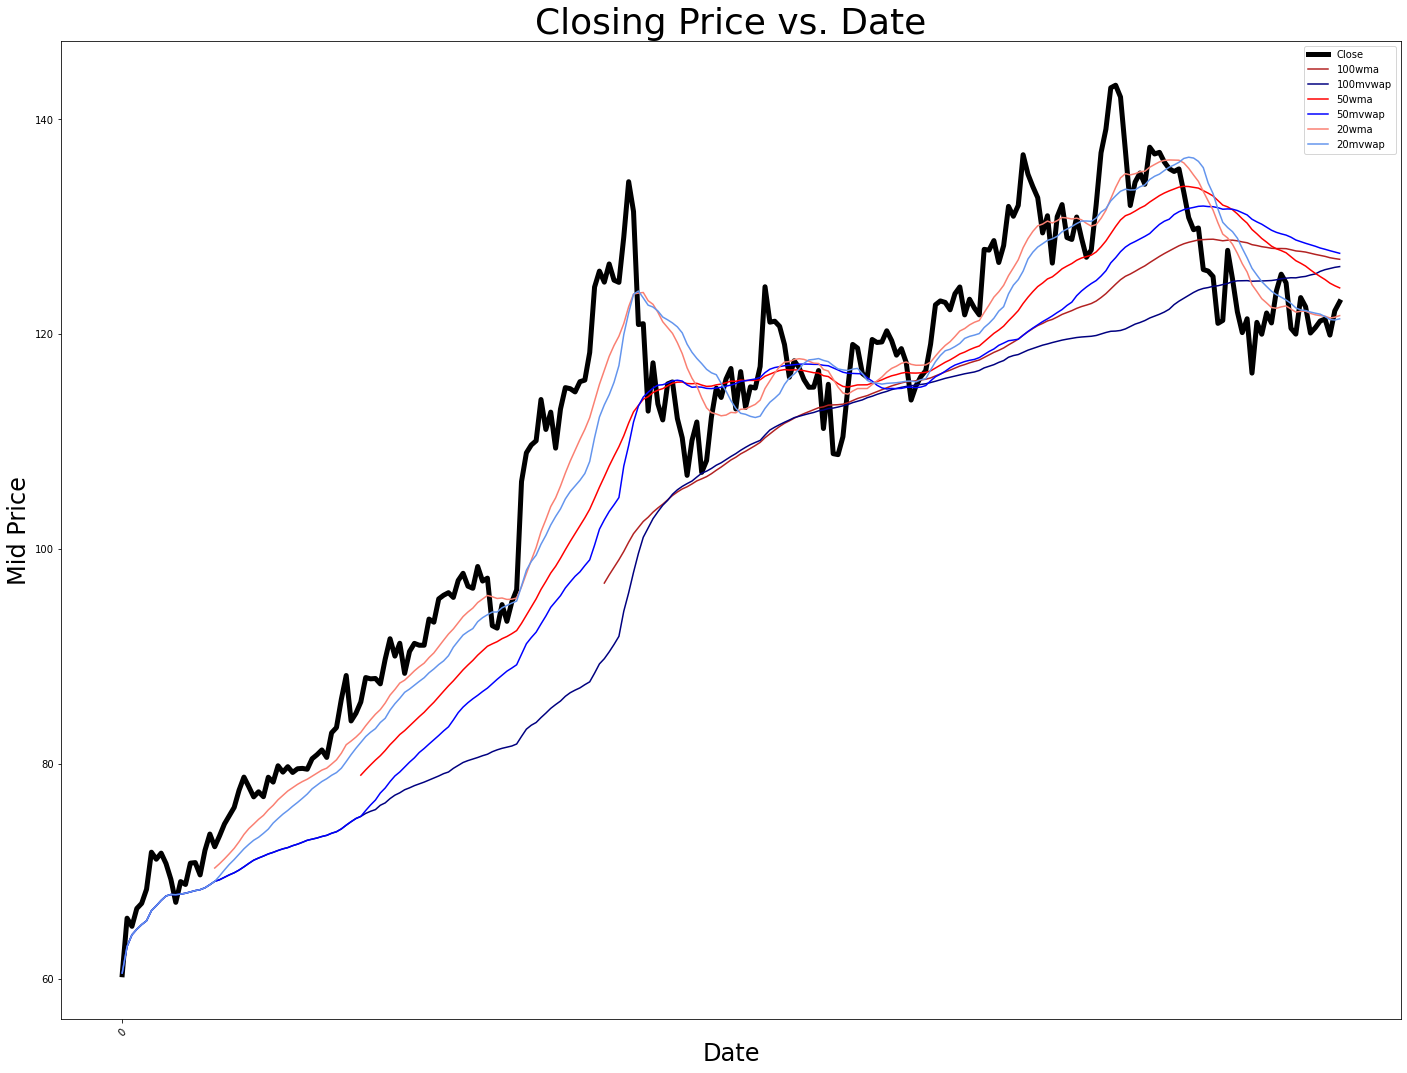

In [12]:
#Plotting with moving average indicators

fig = test_data.get_line_plot()
fig.show()

<AxesSubplot:>

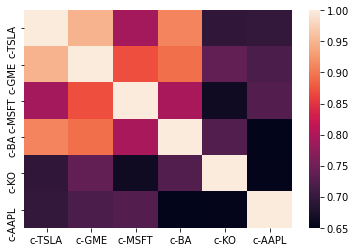

In [13]:
ax = test_data.get_closing_correlation_heatmap(tickers=["TSLA", "GME", "MSFT", "BA", "KO"])
ax

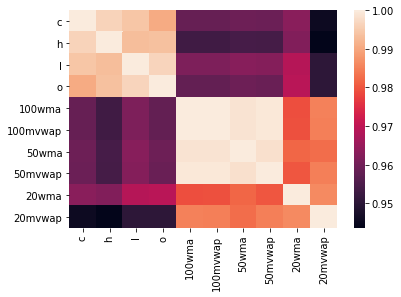

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['c', 'h', 'l', 'o',
       '100wma', '100mvwap', '50wma', '50mvwap', '20wma', '20mvwap']
df = test_data.get_cleaned_data()[cols]
static_corrs = df.corr(method='spearman')
static_corrs
ax = sns.heatmap(static_corrs)